In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dataset.csv') 

In [3]:
data.head()

Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0

In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [6]:
data['month'] = data['Date/Time'].dt.to_period('M')

In [7]:
mean_close = data.groupby(['Ticker', 'month'])['Close'].mean().unstack() 
mean_close

month    2017-12    2018-01    2018-02    2018-03     2018-04    2018-05  \
Ticker                                                                     
FPT          NaN        NaN        NaN        NaN         NaN        NaN   
MSN     74.93829  89.517747  87.573873  98.692318  102.456971  89.089102   
PNJ          NaN        NaN  78.716989  85.130973   88.115627  83.726772   
VIC          NaN        NaN        NaN        NaN         NaN        NaN   

month     2018-06    2018-07    2018-08    2018-09  ...    2020-03    2020-04  \
Ticker                                              ...                         
FPT           NaN        NaN        NaN        NaN  ...  41.452526  41.458807   
MSN     83.026672  77.047871  90.012941  93.018764  ...  49.339921  57.990360   
PNJ     78.791395  63.409948  71.732937  72.689842  ...  61.679224  57.184269   
VIC           NaN        NaN        NaN        NaN  ...  89.897820  93.645712   

month     2020-05    2020-06    2020-07    2020-08    2020-09    2020-10  \
Ticker                                                                     
FPT     47.338551  47.512233  46.897670  47.633732  50.140790  51.738595   
MSN     61.595250  59.755528  54.671095  53.102399  54.236662  73.092800   
PNJ     61.631897  61.098644  57.445522  56.135360  60.299441  64.653713   
VIC     95.947990  94.083465  89.294559  88.395518  93.441194  97.548055   

month      2020-11     2020-12  
Ticker                          
FPT      54.024955   56.537301  
MSN      84.966748   83.465552  
PNJ      73.500114   77.387613  
VIC     105.014388  105.559692  

[4 rows x 37 columns]

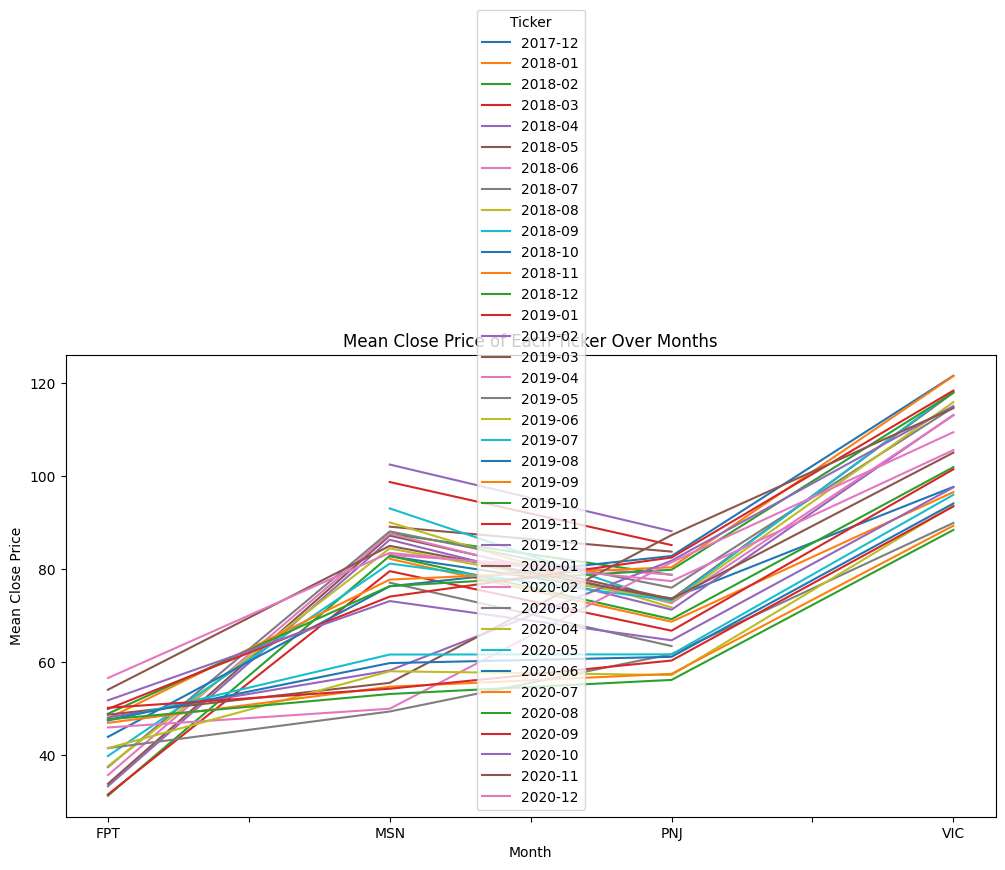

In [8]:
mean_close.plot(figsize=(12, 6))
plt.title('Mean Close Price of Each Ticker Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')
plt.legend(title='Ticker')
plt.show()

In [9]:
msn_data = data[data['Ticker'] == 'MSN']
msn_data

Ticker           Date/Time  Open  High   Low  Close  Volume  \
97406     MSN 2017-12-25 09:15:00  73.1  73.1  73.1   73.1    4210   
97407     MSN 2017-12-25 09:16:00  73.0  73.0  73.0   73.0    5000   
97408     MSN 2017-12-25 09:18:00  73.5  73.5  73.5   73.5     210   
97409     MSN 2017-12-25 09:20:00  73.2  73.5  73.1   73.1    2050   
97410     MSN 2017-12-25 09:21:00  73.0  73.0  73.0   73.0    1380   
...       ...                 ...   ...   ...   ...    ...     ...   
232755    MSN 2020-12-22 14:23:00  82.8  82.8  82.8   82.8     700   
232756    MSN 2020-12-22 14:24:00  82.7  82.8  82.7   82.8    4660   
232757    MSN 2020-12-22 14:25:00  82.8  82.8  82.8   82.8      50   
232758    MSN 2020-12-22 14:27:00  82.8  82.8  82.8   82.8     300   
232759    MSN 2020-12-22 14:46:00  82.8  82.8  82.8   82.8     200   

        Open Interest    month  
97406               0  2017-12  
97407               0  2017-12  
97408               0  2017-12  
97409               0  2017-12  
97410               0  2017-12  
...               ...      ...  
232755              0  2020-12  
232756              0  2020-12  
232757              0  2020-12  
232758              0  2020-12  
232759              0  2020-12  

[135354 rows x 9 columns]

In [10]:
msn_data['return'] = msn_data['Close'].pct_change()

C:\Users\Shree\AppData\Local\Temp\ipykernel_4732\3419591610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn_data['return'] = msn_data['Close'].pct_change()


In [11]:
monthly_return = msn_data.groupby(msn_data['Date/Time'].dt.to_period('M'))['return'].mean() 
monthly_return

Date/Time
2017-12    0.000093
2018-01    0.000062
2018-02   -0.000003
2018-03    0.000069
2018-04   -0.000050
2018-05   -0.000025
2018-06   -0.000003
2018-07    0.000025
2018-08    0.000034
2018-09   -0.000006
2018-10   -0.000022
2018-11   -0.000009
2018-12   -0.000008
2019-01    0.000002
2019-02    0.000049
2019-03   -0.000013
2019-04    0.000014
2019-05   -0.000002
2019-06   -0.000009
2019-07   -0.000009
2019-08   -0.000016
2019-09    0.000014
2019-10   -0.000014
2019-11   -0.000015
2019-12   -0.000044
2020-01   -0.000036
2020-02   -0.000003
2020-03    0.000005
2020-04    0.000044
2020-05    0.000017
2020-06   -0.000029
2020-07   -0.000012
2020-08    0.000018
2020-09    0.000004
2020-10    0.000105
2020-11    0.000008
2020-12    0.000010
Freq: M, Name: return, dtype: float64

In [13]:
monthly_return = monthly_return.groupby(monthly_return.index.year).agg(['min', 'max'])

In [14]:
monthly_return['ratio'] = monthly_return['max'] / monthly_return['min']

In [15]:
min_ratio_year = monthly_return['ratio'].idxmin()

In [16]:
print(f"Year with minimum ratio for 'MSN': {min_ratio_year}")

Year with minimum ratio for 'MSN': 2020


In [17]:
pnj_data = data[data['Ticker'] == 'PNJ'] 
pnj_data

Ticker           Date/Time   Open   High    Low  Close  Volume  \
232760    PNJ 2018-02-28 09:15:00  78.14  78.99  78.14  78.99     270   
232761    PNJ 2018-02-28 09:16:00  78.94  78.94  78.94  78.94      10   
232762    PNJ 2018-02-28 09:19:00  78.14  78.14  78.14  78.14     283   
232763    PNJ 2018-02-28 09:20:00  78.14  78.14  78.14  78.14     480   
232764    PNJ 2018-02-28 09:21:00  78.14  78.14  78.14  78.14     146   
...       ...                 ...    ...    ...    ...    ...     ...   
358064    PNJ 2020-12-22 14:22:00  78.20  78.20  78.20  78.20    5000   
358065    PNJ 2020-12-22 14:23:00  78.20  78.20  78.20  78.20    1700   
358066    PNJ 2020-12-22 14:24:00  78.20  78.20  78.20  78.20     870   
358067    PNJ 2020-12-22 14:25:00  78.10  78.10  78.10  78.10   13000   
358068    PNJ 2020-12-22 14:46:00  78.30  78.30  78.30  78.30    1500   

        Open Interest    month  
232760              0  2018-02  
232761              0  2018-02  
232762              0  2018-02  
232763              0  2018-02  
232764              0  2018-02  
...               ...      ...  
358064              0  2020-12  
358065              0  2020-12  
358066              0  2020-12  
358067              0  2020-12  
358068              0  2020-12  

[125309 rows x 9 columns]

In [18]:
pnj_data['return'] = pnj_data['Close'].pct_change()

C:\Users\Shree\AppData\Local\Temp\ipykernel_4732\415387063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnj_data['return'] = pnj_data['Close'].pct_change()


In [19]:
pnj_data['Performance'] = pd.cut(pnj_data['return'], bins=[-float('inf'), 0, float('inf')], labels=['NEGATIVE', 'POSITIVE'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_4732\4212958204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pnj_data['Performance'] = pd.cut(pnj_data['return'], bins=[-float('inf'), 0, float('inf')], labels=['NEGATIVE', 'POSITIVE'])


In [21]:
march_1_data = pnj_data[(pnj_data['Date/Time'] == '2018-03-01') & 
                        (pnj_data['Date/Time'] >= '10:50:00') & 
                        (pnj_data['Date/Time'] <= '13:05:00')] 

march_1_data

Empty DataFrame
Columns: [Ticker, Date/Time, Open, High, Low, Close, Volume, Open Interest, month, return, Performance]
Index: []

In [22]:
performance_counts = march_1_data['Performance'].value_counts()
percentages = (performance_counts / performance_counts.sum()) * 100
print("Performance Counts:", performance_counts)
print("Performance Percentages:", percentages)

Performance Counts: NEGATIVE    0
POSITIVE    0
Name: Performance, dtype: int64
Performance Percentages: NEGATIVE   NaN
POSITIVE   NaN
Name: Performance, dtype: float64


In [23]:
from sklearn.decomposition import PCA

In [24]:
vic_data = data[data['Ticker'] == 'VIC'][['Open', 'Close', 'High', 'Low']].dropna()
vic_data

Open  Close   High    Low
358069   98.5   98.5   98.5   98.5
358070   98.5   98.5   98.5   98.5
358071   98.6   98.6   98.6   98.6
358072   98.6   98.6   98.6   98.6
358073   98.6   98.7   98.7   98.6
...       ...    ...    ...    ...
459330  105.8  105.7  105.8  105.7
459331  105.7  105.7  105.7  105.7
459332  105.7  105.7  105.7  105.7
459333  105.7  105.7  105.7  105.7
459334  105.7  105.7  105.7  105.7

[101266 rows x 4 columns]

In [25]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(vic_data)

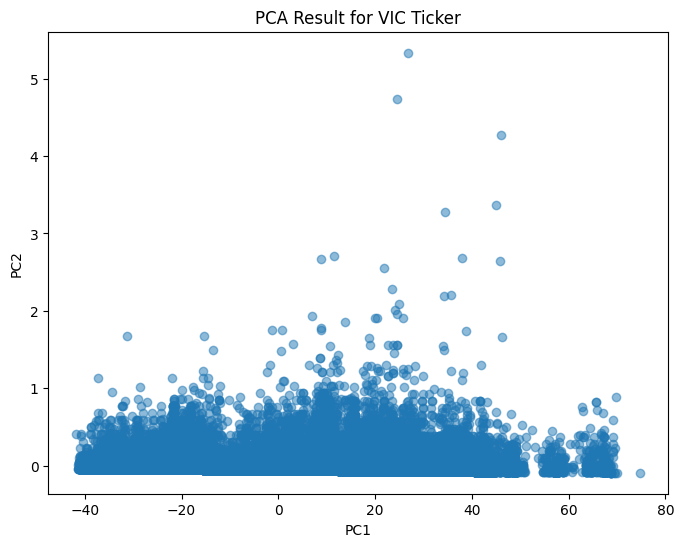

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.title('PCA Result for VIC Ticker')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()